(27, 5000)
Plot for amp, loc=0
Plot for phase, loc=1
Written amplitude
Written phase


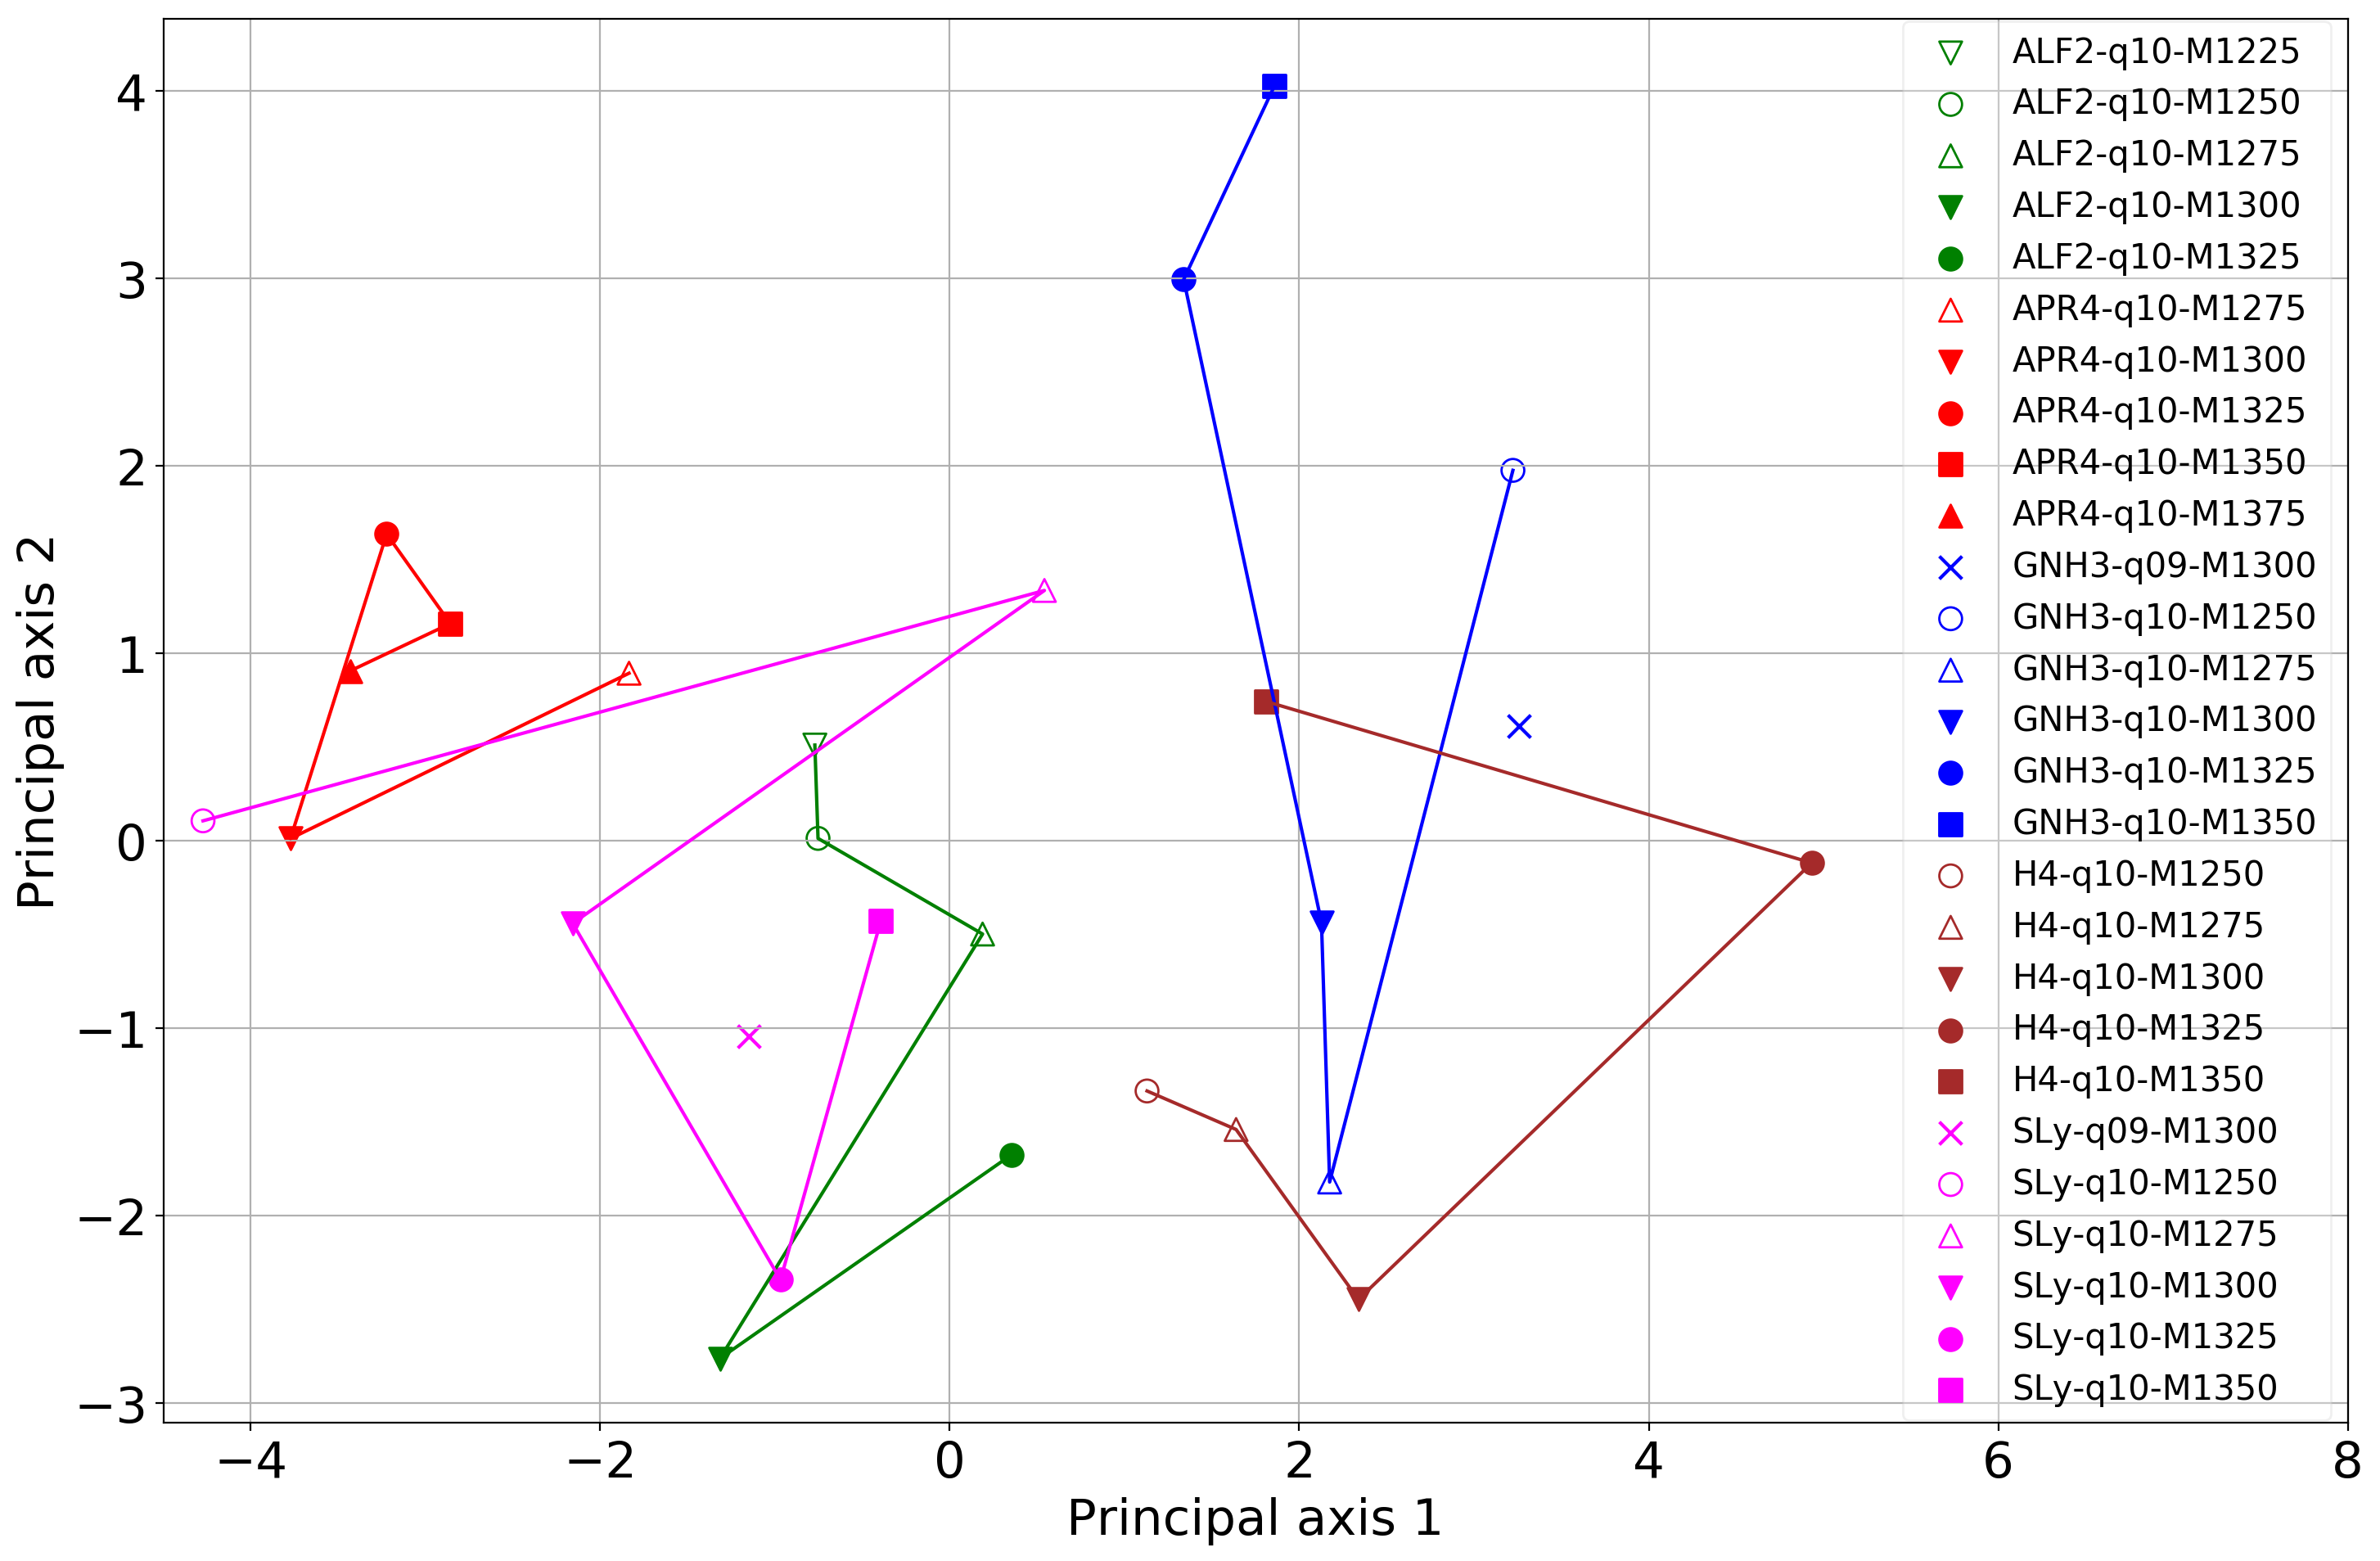

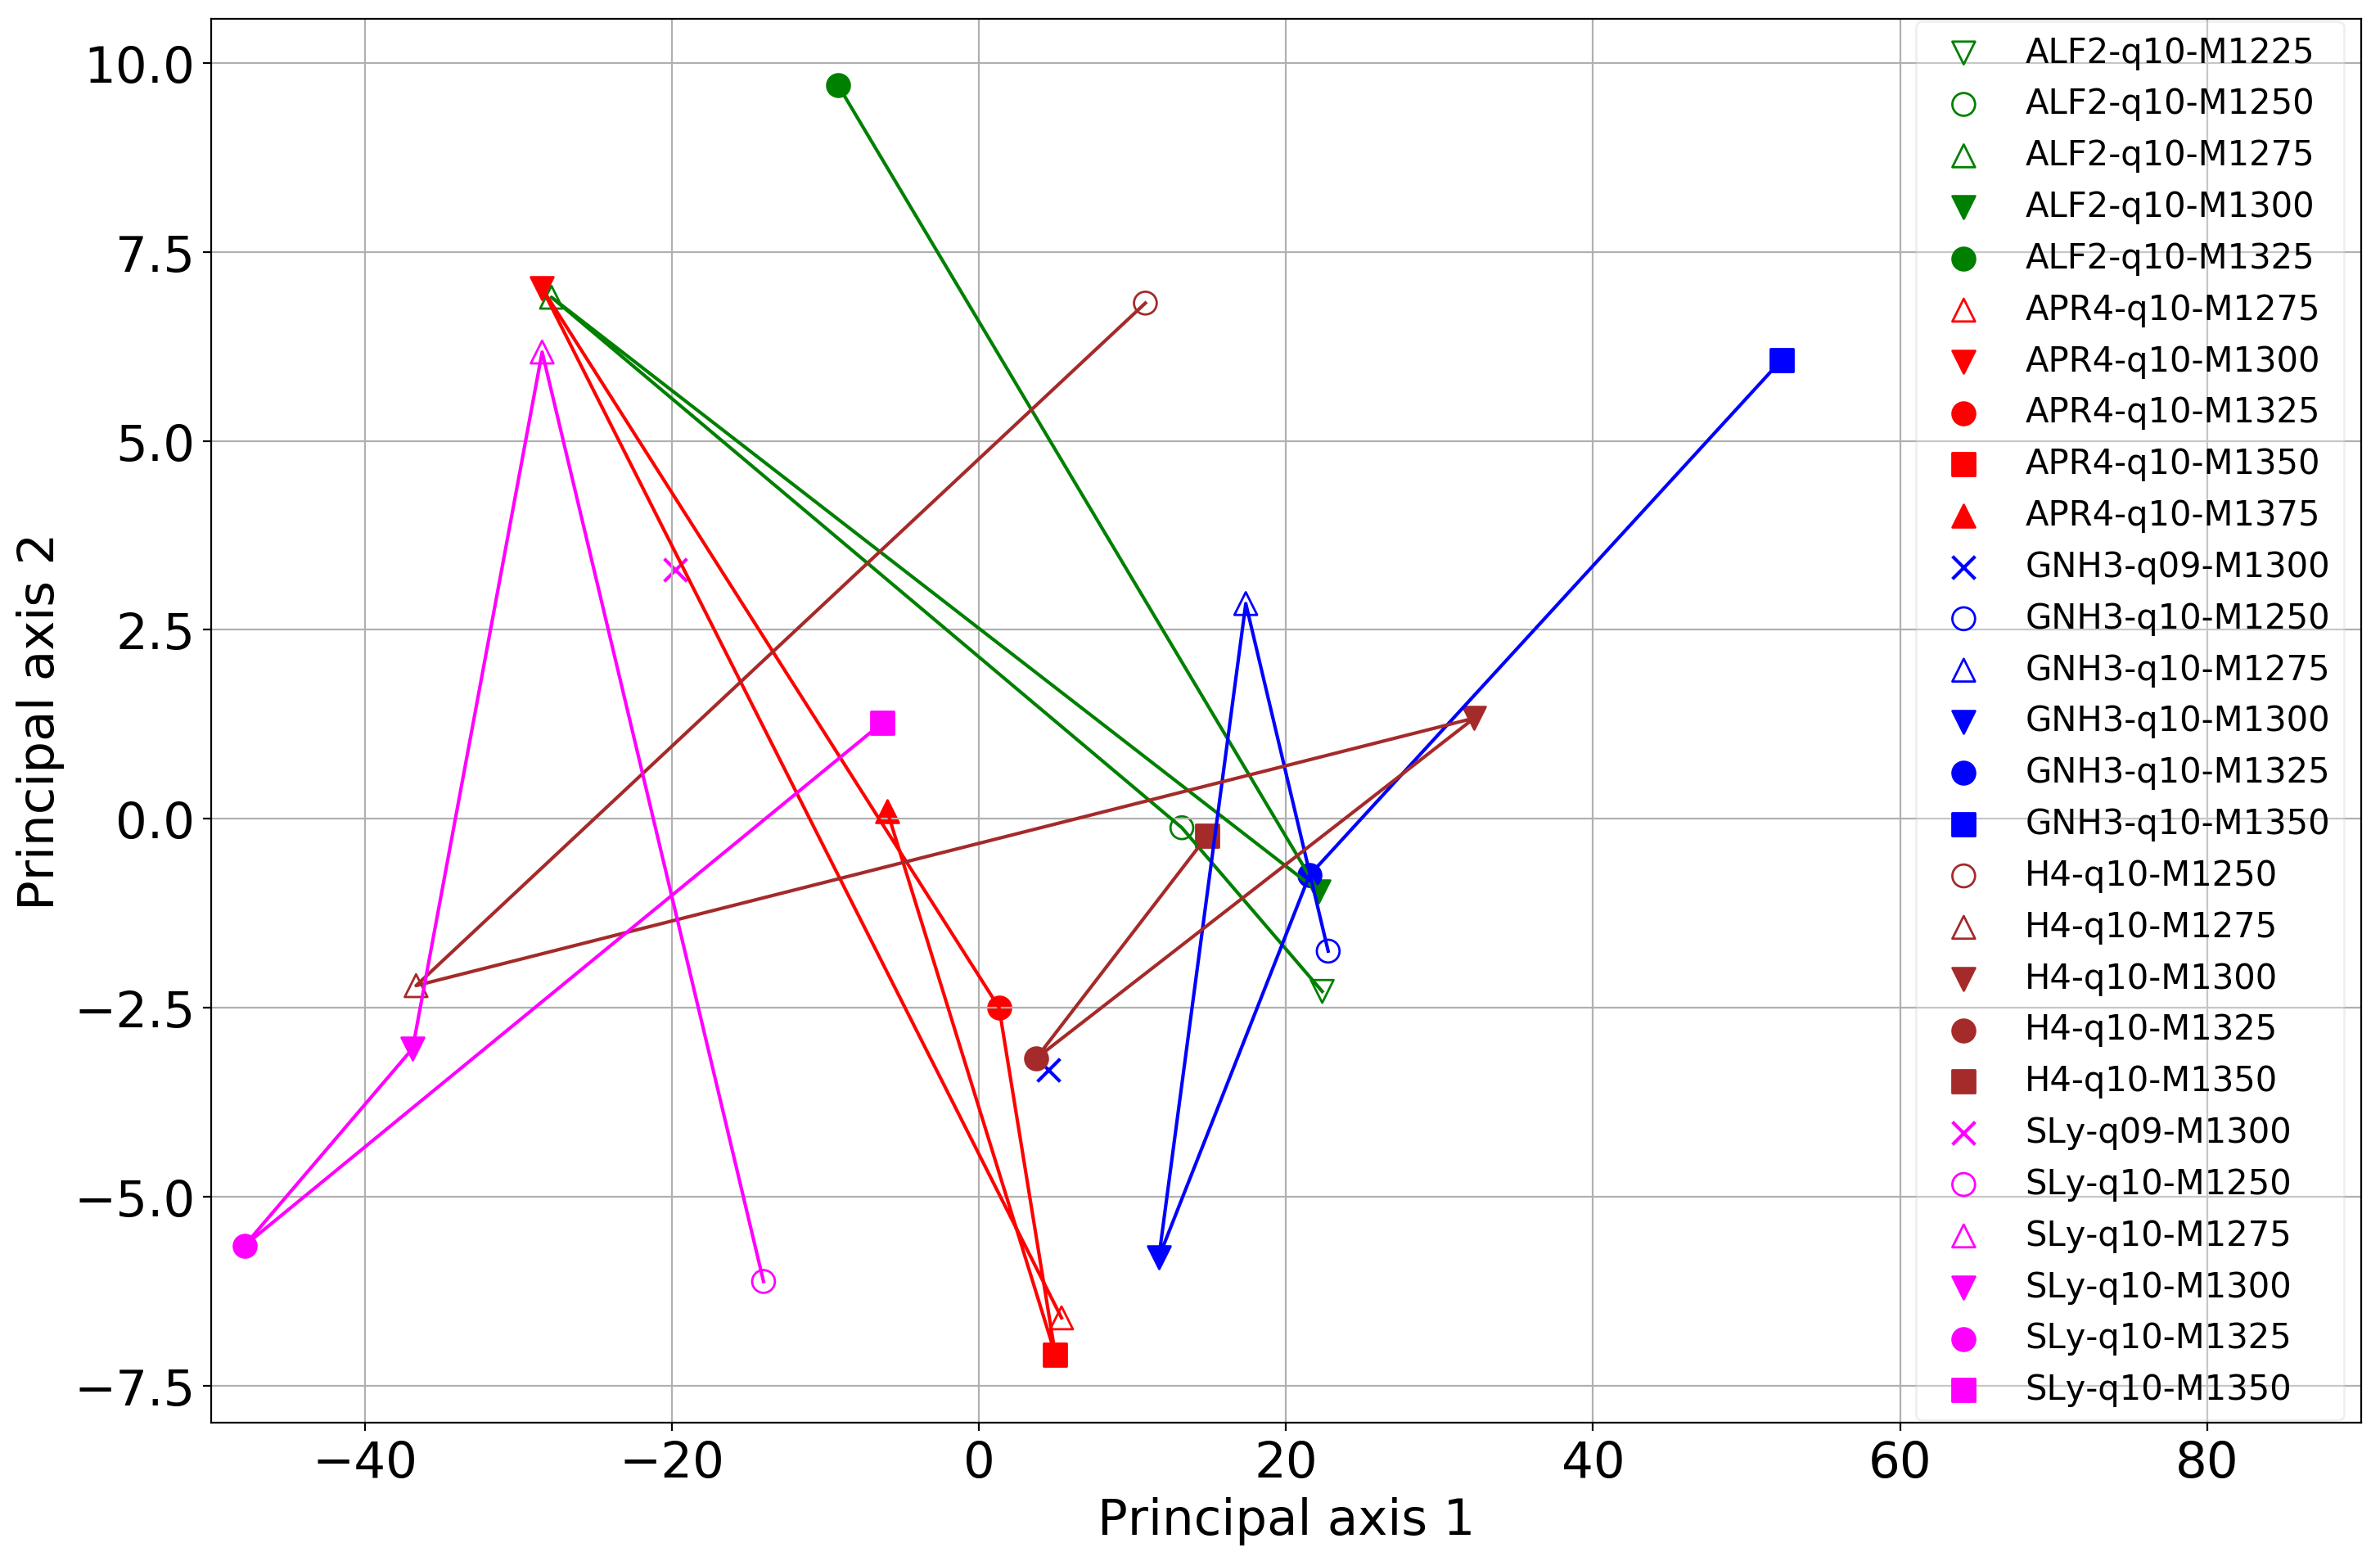

In [8]:


# In[24]:
# @article{scikit-learn,
#  title={Scikit-learn: Machine Learning in {P}ython},
#  author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
#          and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
#          and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
#          Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
#  journal={Journal of Machine Learning Research},
#  volume={12},
#  pages={2825--2830},
#  year={2011}
# }

# https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com
import matplotlib.pyplot as plt
import matplotlib.colors as colours
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm #https://stackoverflow.com/questions/12236566/setting-different-color-for-each-series-in-scatter-plot-on-matplotlib

from matplotlib import rcParams

import numpy as np
import pandas as pd


from matplotlib import pyplot as plt
from numpy.linalg import svd
from FFTclasses import FFTscalar, FFTclass
from PCAFFTclasses import PCAfitclass, FFTPCA

subtractiondebug=False

ScaledFFTOutputPath = '../Data/scaledFFT'
ScaledFFTEndsWith = 'scaled.FFT'
FFTOutputPath = '../Data/FFT'
FFTEndsWith = '.FFT'

ExcludeEOS = 'GAM2'
TestFileName = 'H4-q10-M1325.h_l2_m2.r500.t-1500_5000scaled.FFT'
TrainingExclusionFile = 'H4-q10-M1325.h_l2_m2.r500.t-1500_5000scaled.FFT'

FontSize=22

fft=FFTPCA(ScaledFFTEndsWith,ScaledFFTOutputPath,ExcludeEOS,excluded_file=None)

ncomp=3 # want to visualise the components in 3x3 space
#print(fft.FFT.filenames)
#print(fft.EOSlist) # this has no repeated values but it is ordered

numelems = len(fft.EOS)
c=['']*numelems
m=['']*numelems
cs=['green','red','blue','brown','magenta']
for ind,eos in enumerate(fft.EOS):
    c[ind] = colours.cnames[cs[fft.EOSlist.index(eos)]]
# for ind, q in enumerate(fft.Q):
#     if q==10:
#         m[ind]='o'
#     else:
#         m[ind]='x'
#print(m)
#print(fft.EOS) # this is ordered with the original FFT plots as 1:1
fft.PCAfit(n_components=ncomp)
fft.CalculatePCAValues()
coeffs = fft.Coeffs
#coeffs.shape.printFFT('Shape')
colourvalues={'GNH3':'blue','H4':'brown','ALF2':'green','SLy':'magenta','APR4':'red'}
markervalues={'1225':'v','1250':'o','1275':'^','1300':'v','1325':'o','1350':'s','1375':'^'}
markerfill={'1225':False,'1250':False,'1275':False,'1300':True,'1325':True,'1350':True,'1375':True}
plottypes=['amp','phase'] # choose from ['amp','log','phase']
FullPlotTypes={'amp':'amplitude','phase':'phase','log':'log based 10 of the amplitude'}
rcParams.update({'font.size': FontSize}) # default font size for all features
figs=[]
for loc,plottype in enumerate(plottypes):
    fig=plt.figure(loc,figsize=(15,10),dpi=200)
    figs.append(fig)
    print('Plot for {}, loc={}'.format(plottype,loc))
    ax = fig.add_subplot(111)# , projection='3d')*************** 2D only **************************************
    if plottype=='log':
        x= coeffs.log
    elif plottype=='amp':
        x=coeffs.amp
    else:
        x=coeffs.phase
#     plt.title('First two PCA coefficients for %s for unscaled FFT waveforms' % plottype)
    if plottype=='amp':
        plt.xlim([-4.5,8])
    if plottype=='phase':
#         xlim=ax.get_xlim()
#         print(xlim)
        plt.xlim(-50,90)
    for ind,eos in enumerate(fft.EOS): # enumerate the eos for each NR FFT
        colour=colourvalues[eos]
        marker = markervalues[fft.M[ind]]
        fill = markerfill[fft.M[ind]]
        if fft.Q[ind]==9:
            marker = 'x'
        if markerfill[fft.M[ind]]: # if filled markers
            ax.scatter(x[ind,0],x[ind,1],
                edgecolors=colour,marker=marker,facecolors=colour,s=100,
                label=fft.description[ind][:-6]) # x[ind,2], depthshade=False, ************** 2D only **************
        else:
            ax.scatter(x[ind,0],x[ind,1],
                edgecolors=colour,marker=marker,facecolors='none',s=100,
                label=fft.description[ind][:-6])
        plt.legend(loc="right",fontsize=15) # x[ind,2], depthshade=False, ************** 2D only **************
        plt.grid(which='major',axis='both')
    leg = ax.get_legend()
    leg.get_frame().set_alpha(0.3)
    ax.set_xlabel('Principal axis 1')
    ax.set_ylabel('Principal axis 2')

    # ax.set_zlabel('Principal axis 3') ************** 2D only **************
prevEOS = None
for eos in fft.EOSlist:
    colour=colourvalues[eos]
    eosind= [i for i, EOSval in enumerate(fft.EOS) if EOSval == eos and fft.Q[i]!=9]
    # assuming sequential values !!!!
    ind1 = min(eosind)
    ind2 = max(eosind)+1
    for loc,plottype in enumerate(plottypes):
        fig=plt.figure(loc)
        ax = plt.gca()
        if plottype=='log':
            x= coeffs.log
        elif plottype=='amp':
            x=coeffs.amp
        else:
            x=coeffs.phase
        ax.plot(x[ind1:ind2,0],x[ind1:ind2,1],c=colour) # ,x[ind1:ind2,2] ************** 2D only **************
# for loc,plottype in enumerate(plottypes):
#     fig=plt.figure(loc)
#     plt.title('This is figure {}, hopefully not blank'.format(loc))
for loc,plottype in enumerate(plottypes):
    fig=plt.figure(loc)
    ax = plt.gca()
    plt.tight_layout()
    filename='PCAScaled2D{}'.format(plottype)
    shortcaption='Three component PCA of the frequency scaled fourier transform {} projected onto  two dimensions.'.format(FullPlotTypes[plottype])
    caption=r"""Three component PCA of the fourier transform {} projected onto two
            dimensions with frequency scaling applied. Each equation of state is designated by a different colour and each mass value
            a different marker. A line connects adjacent mass values for a given equation of state for equal
            mass ratio values. The two points with non-equal mass ratio are not connected on these lines
            and are designated as x on the plots. % PCASscaled2D.ipynb""".format(
            FullPlotTypes[plottype]) 
    plt.savefig('{}.pdf'.format(filename))
    text_file = open('{}.txt'.format(filename), "w")
    text_file.write(caption)
    text_file.close()
    text_file = open('{}Short.txt'.format(filename), "w")
    text_file.write(shortcaption)
    text_file.close()

    print('Written {}'.format(FullPlotTypes[plottype]))
    

plt.show()

In [51]:
fig=figs[0]
plt.scf(fig)







AttributeError: module 'matplotlib.pyplot' has no attribute 'scf'

In [47]:
ax

In [28]:
figs[0]=[fig]

IndexError: too many indices for array